In [ ]:
import numpy as np
import pandas as pd

from plotnine import ggplot, aes, geom_line, labs, theme_classic, options, theme, element_line, element_text, annotate

options.figure_size = (12, 6) 

def my_theme_classic(base_size=11, base_family=None):
    return theme_classic(base_size=base_size, base_family=base_family) + theme(
        panel_grid_major_y=element_line(color="gray", size=1, alpha=0.2),
        plot_title=element_text(face="bold")
    )




In [12]:
import os

# Kaggle définit automatiquement la variable d'environnement KAGGLE_URL_BASE
ON_KAGGLE = "KAGGLE_URL_BASE" in os.environ

if ON_KAGGLE:
    DATA_PATH = "/kaggle/input/hull-tactical-market-prediction/"
else:
    DATA_PATH = "../data/raw/"



df_train = pd.read_csv(os.path.join(DATA_PATH, "train.csv")).sort_values("date_id")
df_test = pd.read_csv(os.path.join(DATA_PATH, "test.csv")).sort_values("date_id")


## 1 - Take a look on returns

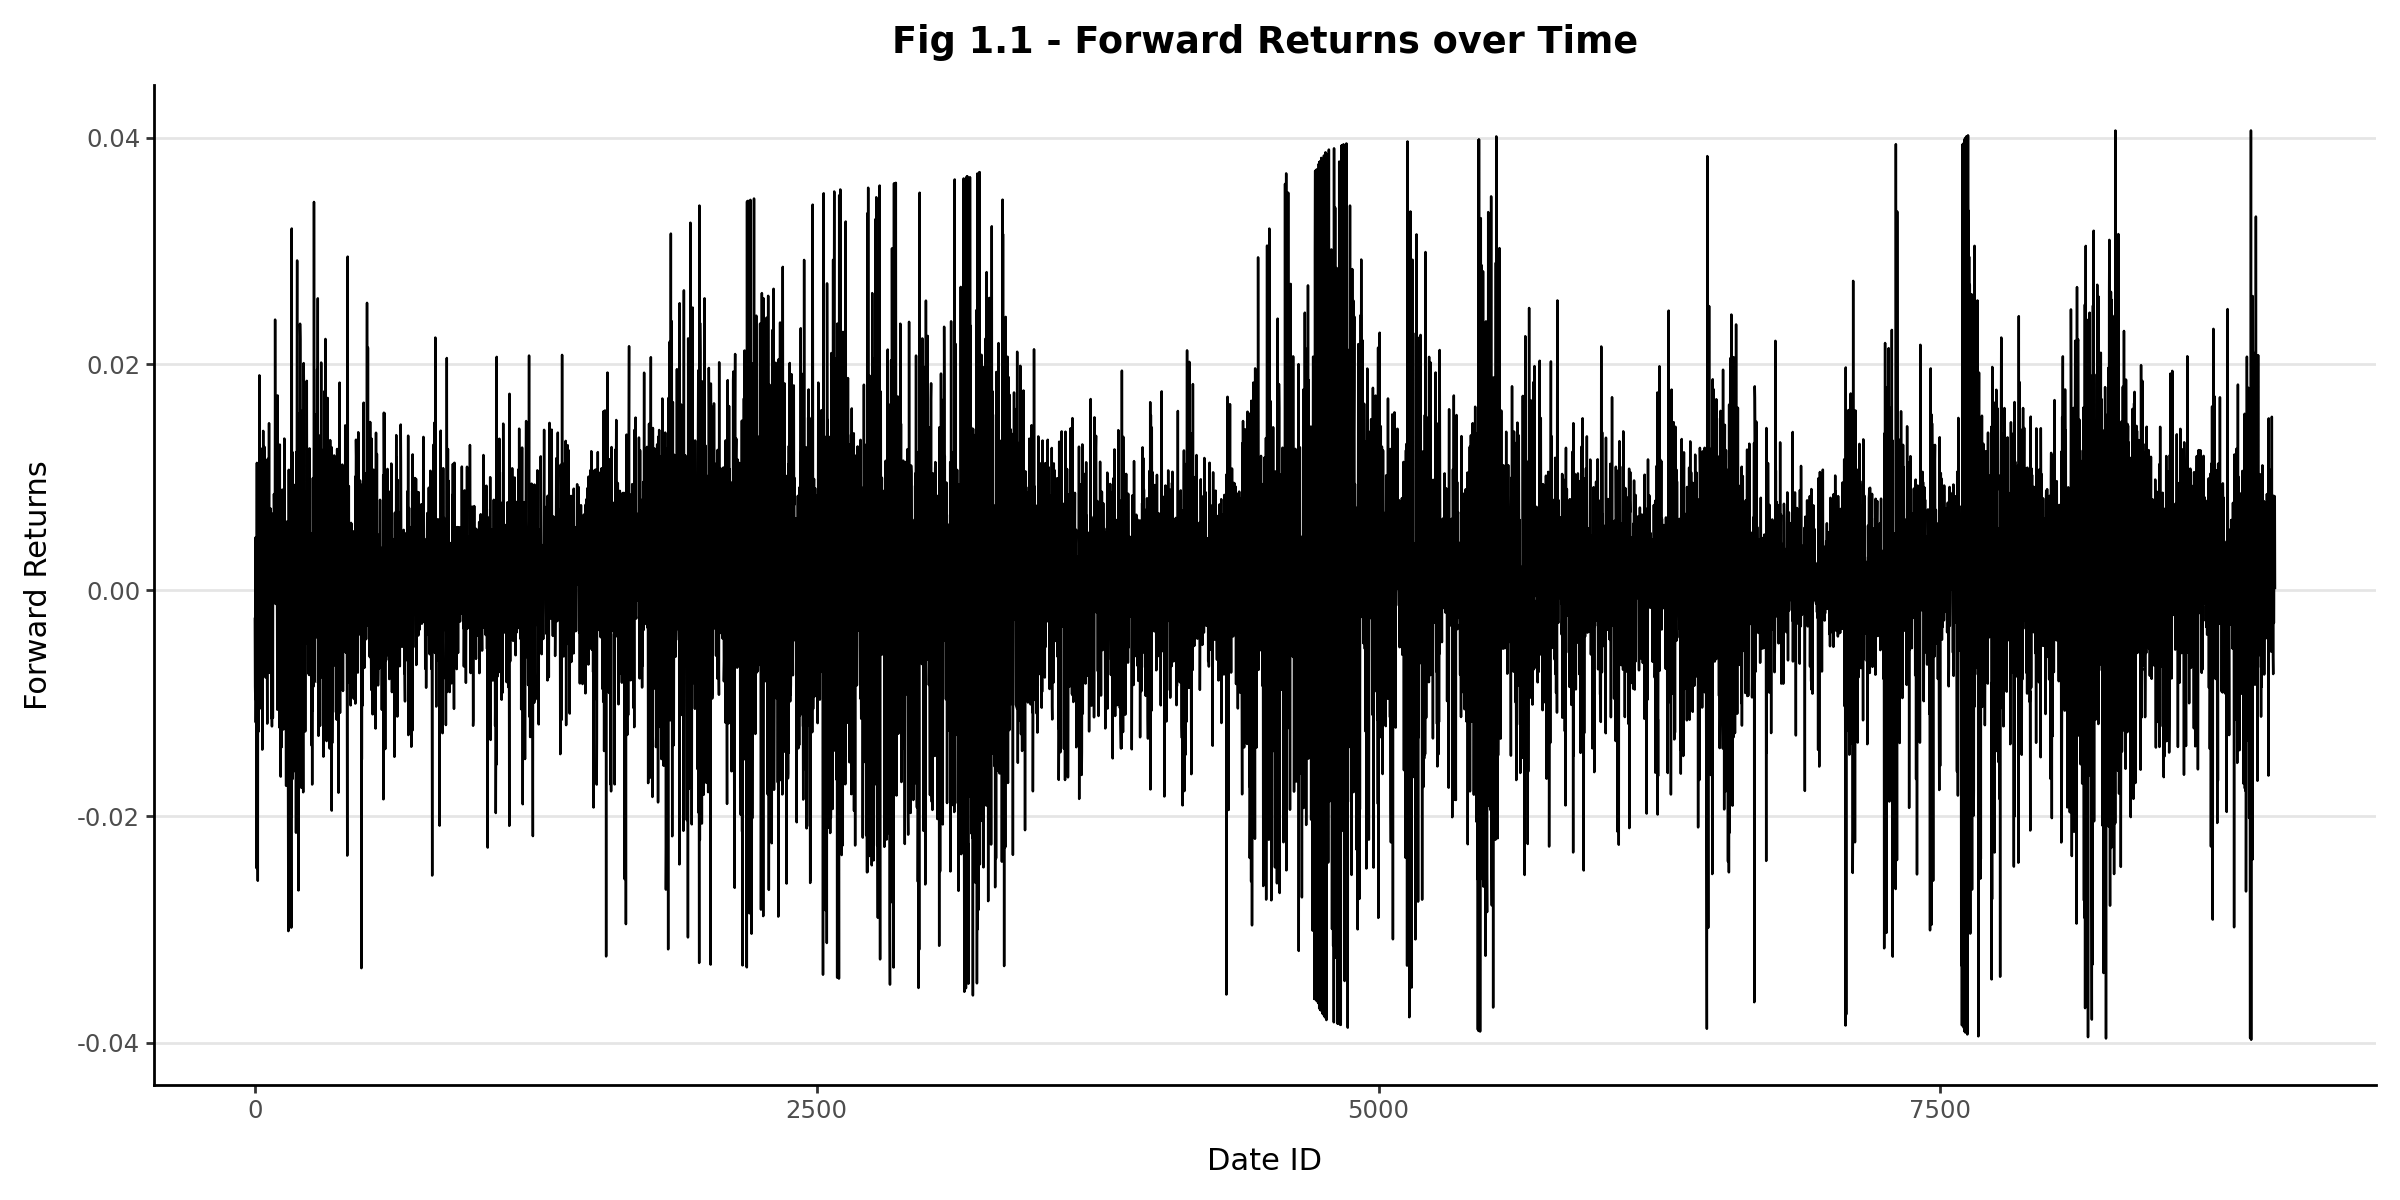

In [31]:
plot = (
    ggplot(df_train, aes(x="date_id", y="forward_returns"))
    + geom_line()
    + labs(
        title="Fig 1.1 - Forward Returns over Time",
        x="Date ID",
        y="Forward Returns"
    )
    + my_theme_classic()
)

plot


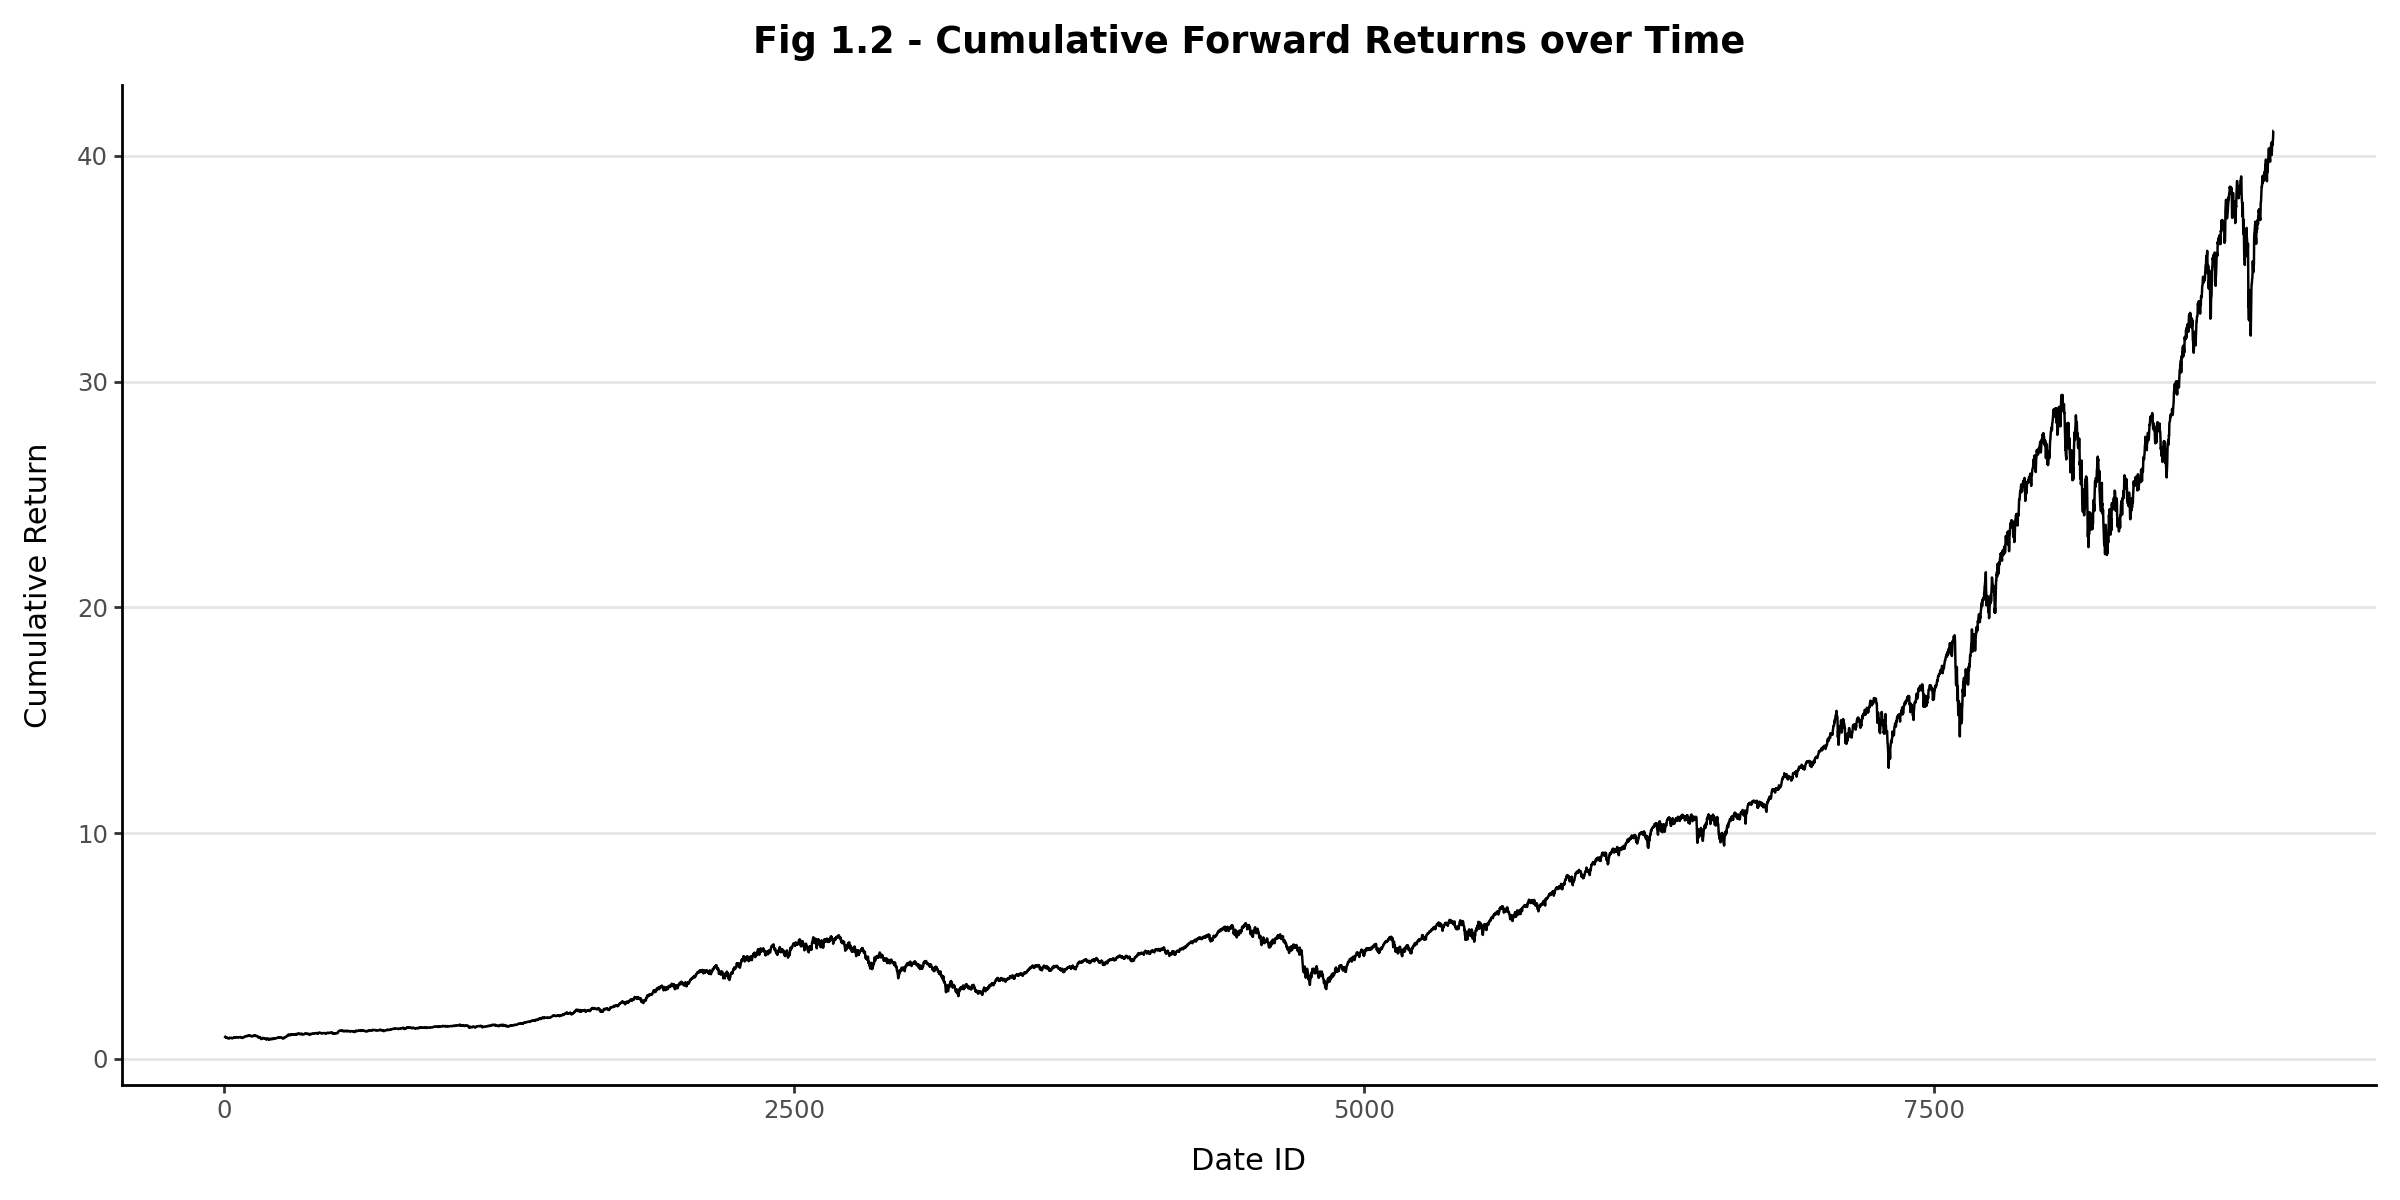

In [30]:
df_train["cumulative_return"] = (1 + df_train["forward_returns"]).cumprod()

plot = (
    ggplot(df_train, aes(x="date_id", y="cumulative_return"))
    + geom_line()
    + labs(
        title="Fig 1.2 - Cumulative Forward Returns over Time",
        x="Date ID",
        y="Cumulative Return"
    )
    + my_theme_classic()
)

plot

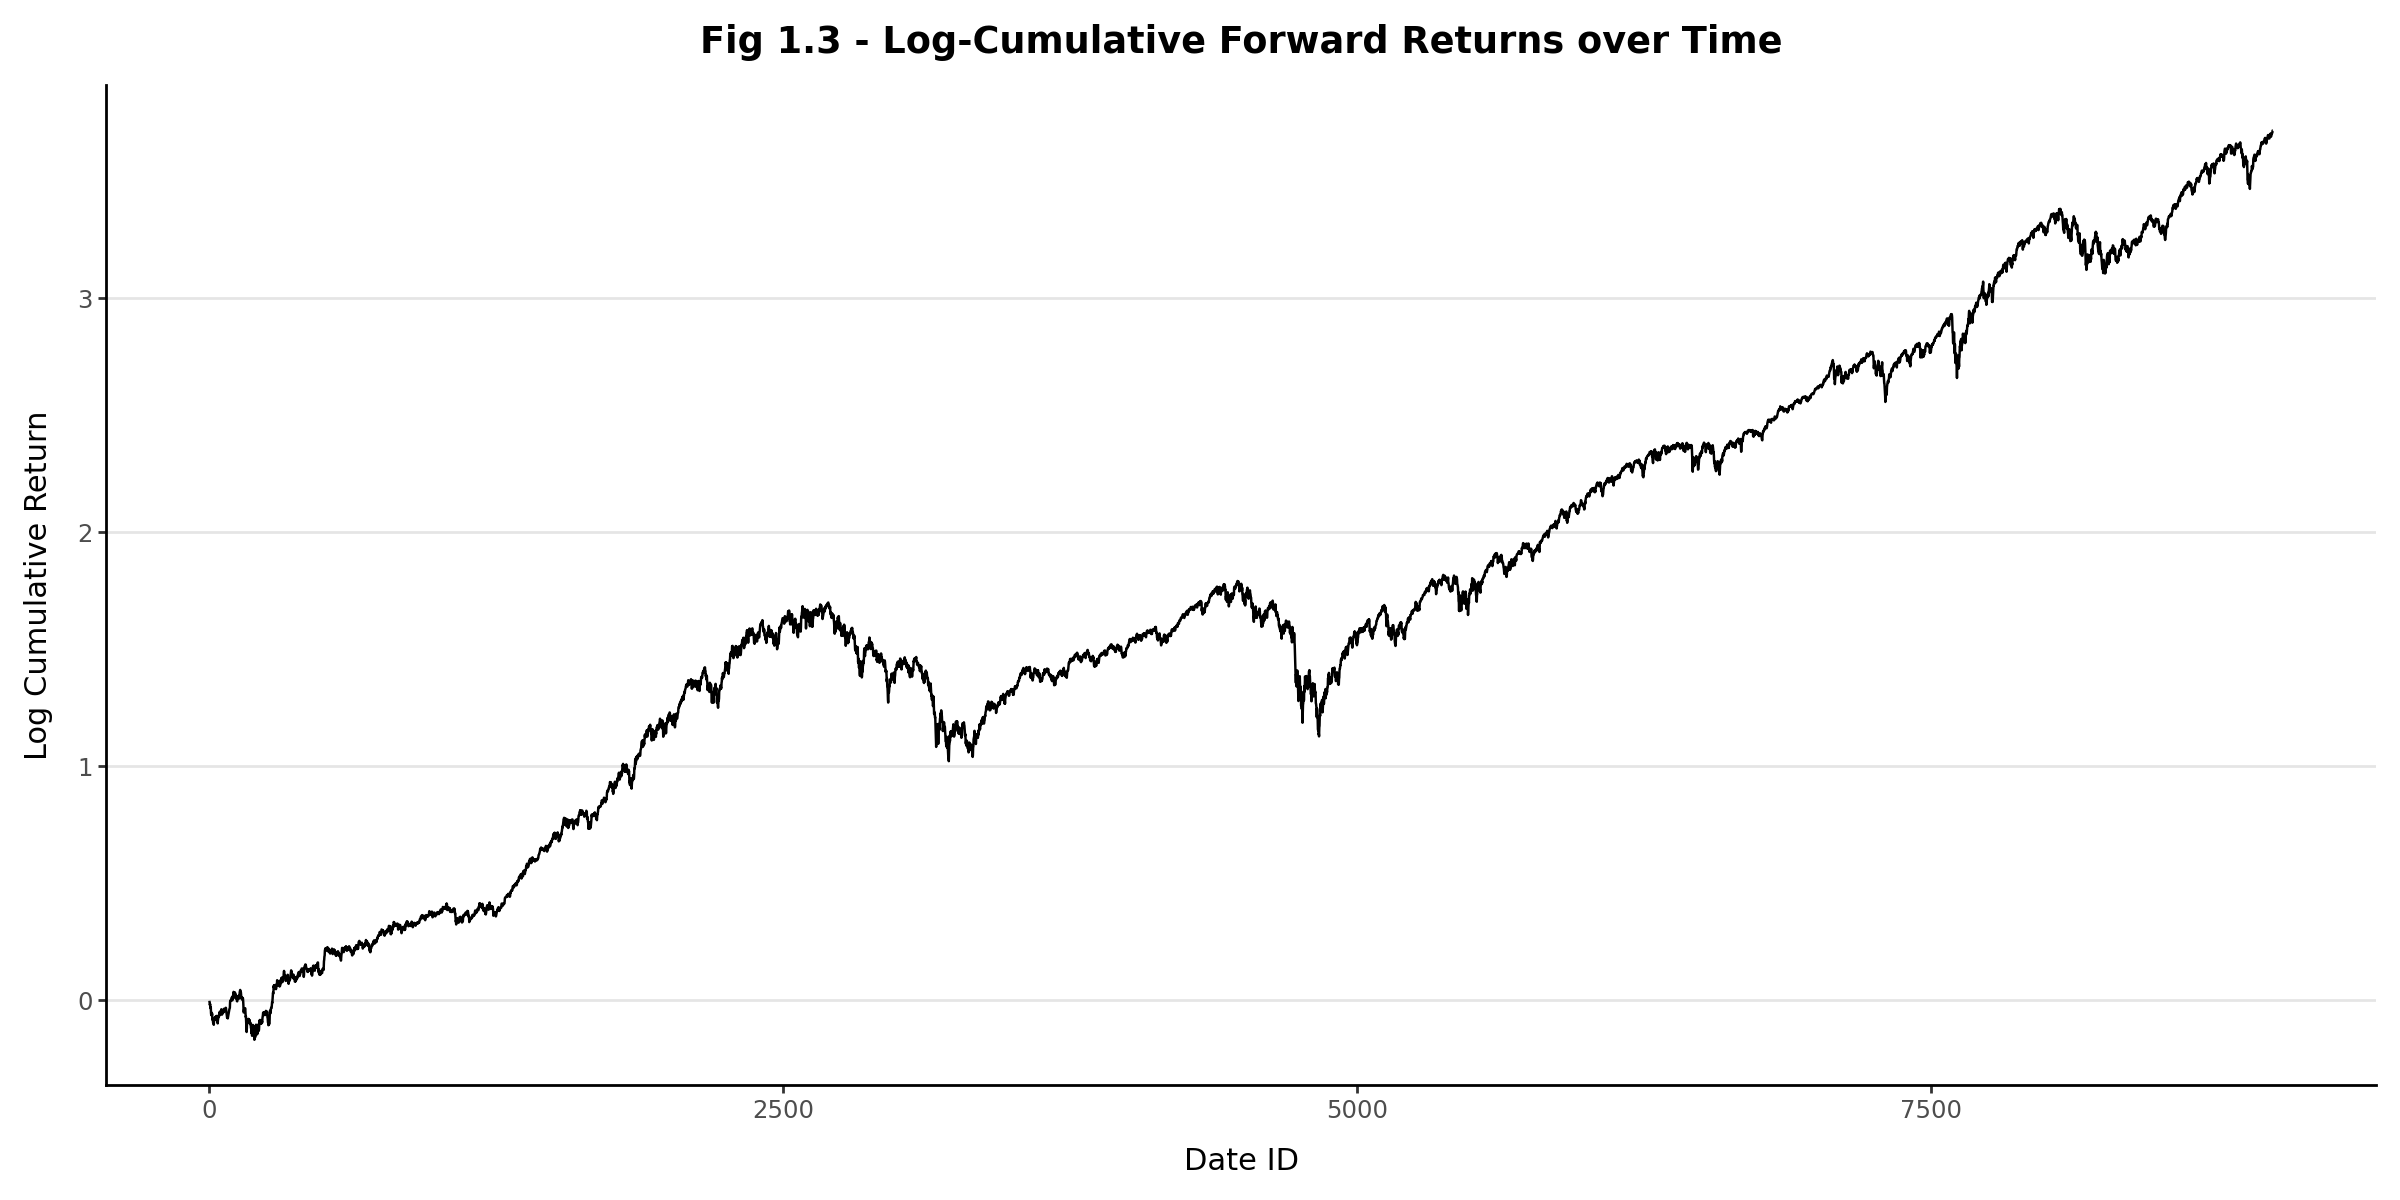

In [ ]:
df_train["log_cumulative_return"] = np.log(df_train["cumulative_return"])

plot = (
    ggplot(df_train, aes(x="date_id", y="log_cumulative_return"))
    + geom_line()
    + labs(
        title="Fig 1.3 - Log Cumulative Forward Returns over Time",
        x="Date ID",
        y="Log Cumulative Return"
    )
    + my_theme_classic()
)

plot